Jalur yang ditemukan DFS (Labirin 1):
[(1, 0), (1, 1), (1, 2), (2, 2), (3, 2),
 (3, 3), (4, 3)]


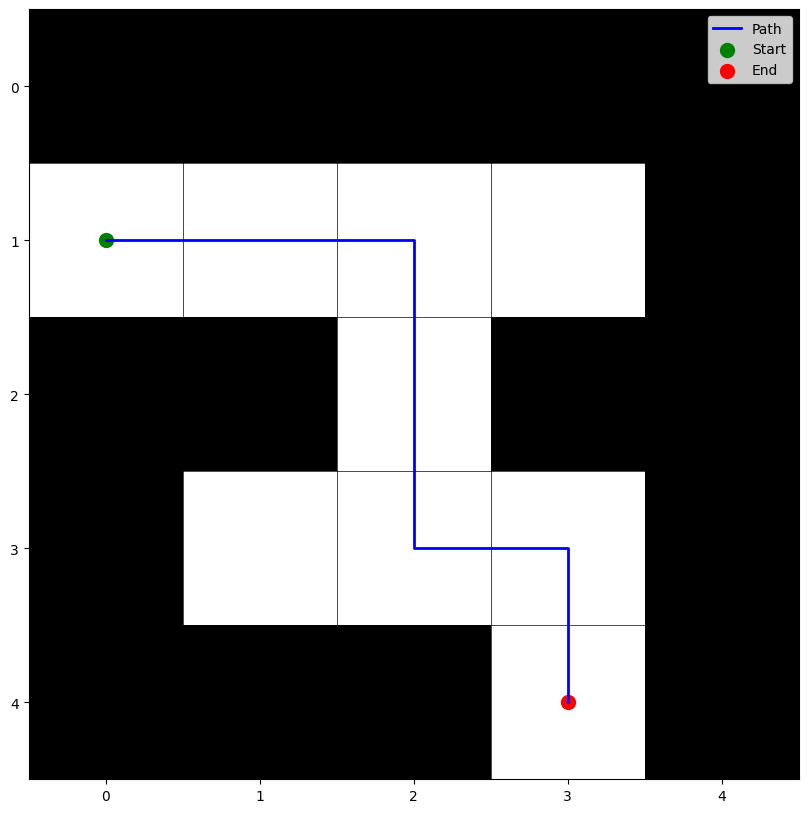

Jalur yang ditemukan DFS (Labirin 2):
[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3),
 (2, 4), (2, 5), (3, 5), (3, 6), (4, 6),
 (4, 7)]


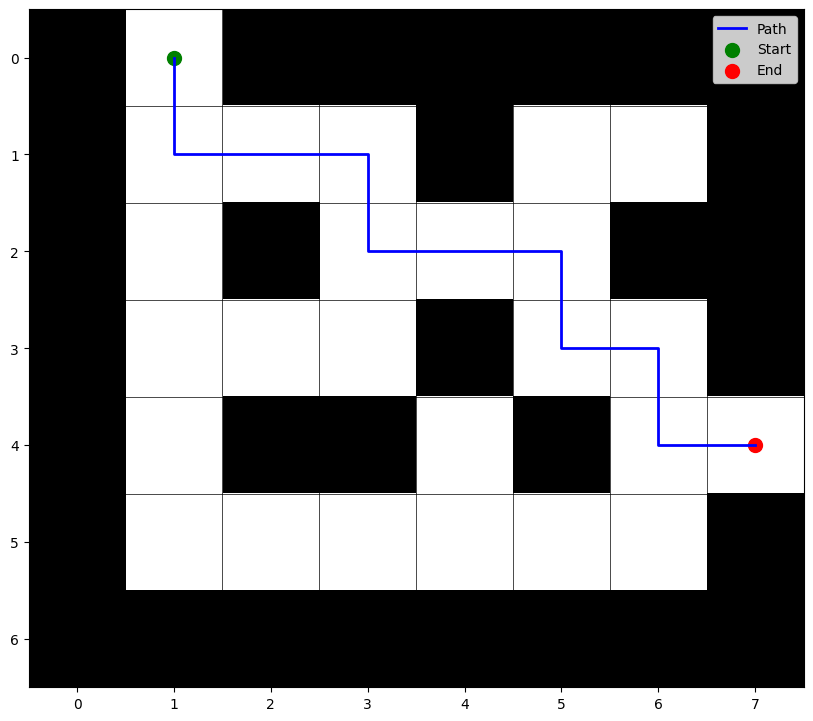

Jalur yang ditemukan DFS (Labirin 3):
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2),
 (3, 3), (3, 4), (3, 5), (4, 5), (5, 5),
 (6, 5), (7, 5), (7, 6), (7, 7), (7, 8),
 (6, 8), (5, 8), (4, 8), (4, 7), (3, 7),
 (2, 7), (2, 8), (1, 8), (0, 8)]


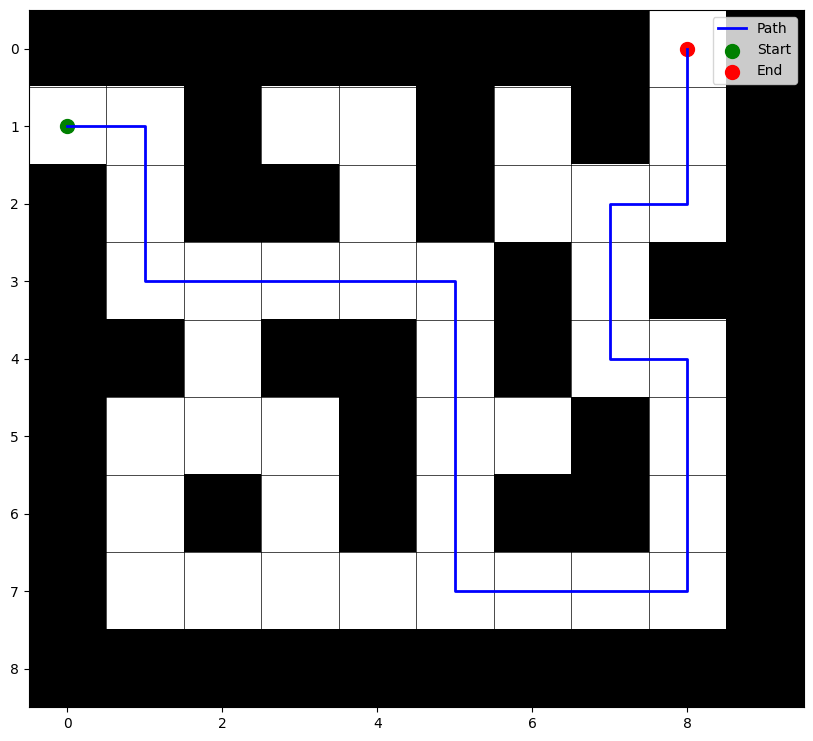

Jalur yang ditemukan DFS (Labirin 4):
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2),
 (3, 3), (3, 4), (4, 4), (5, 4), (5, 5),
 (5, 6), (5, 7), (5, 8), (5, 9), (5, 10),
 (6, 10), (7, 10), (7, 11), (7, 12), (8, 12),
 (9, 12), (9, 11), (9, 10), (9, 9), (9, 8),
 (10, 8), (11, 8), (11, 9), (11, 10), (11, 11),
 (11, 12), (11, 13), (12, 13)]


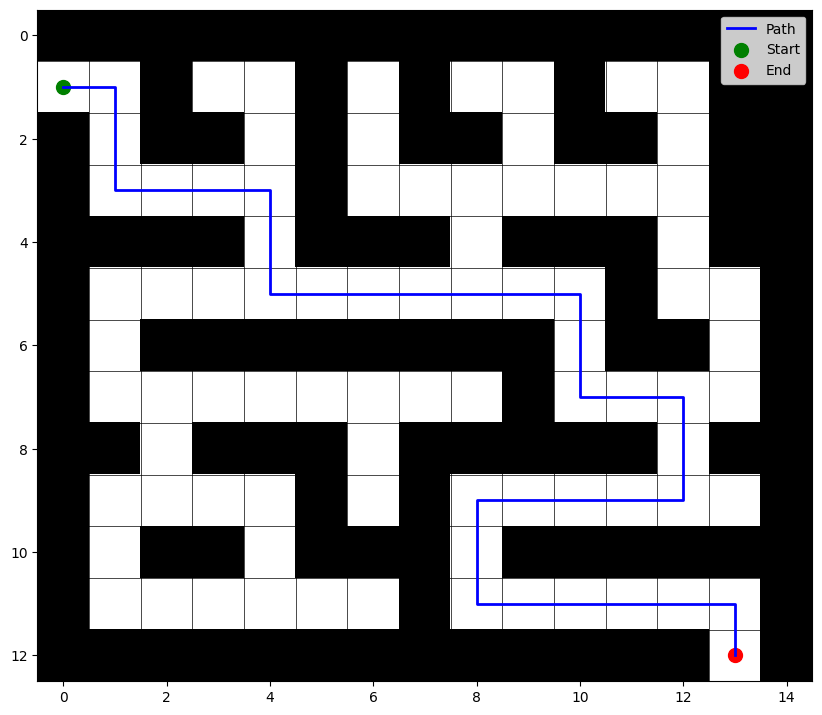

Jalur yang ditemukan DFS (Labirin 5):
[(3, 0), (3, 1), (3, 2), (3, 3), (4, 3),
 (5, 3), (5, 4), (5, 5), (5, 6), (6, 6),
 (7, 6), (8, 6), (9, 6), (10, 6), (11, 6),
 (11, 7), (11, 8), (11, 9), (11, 10), (10, 10),
 (9, 10), (8, 10), (7, 10), (6, 10), (6, 11),
 (6, 12), (7, 12), (7, 13), (7, 14), (8, 14),
 (8, 15), (9, 15), (10, 15), (10, 14), (11, 14),
 (12, 14)]


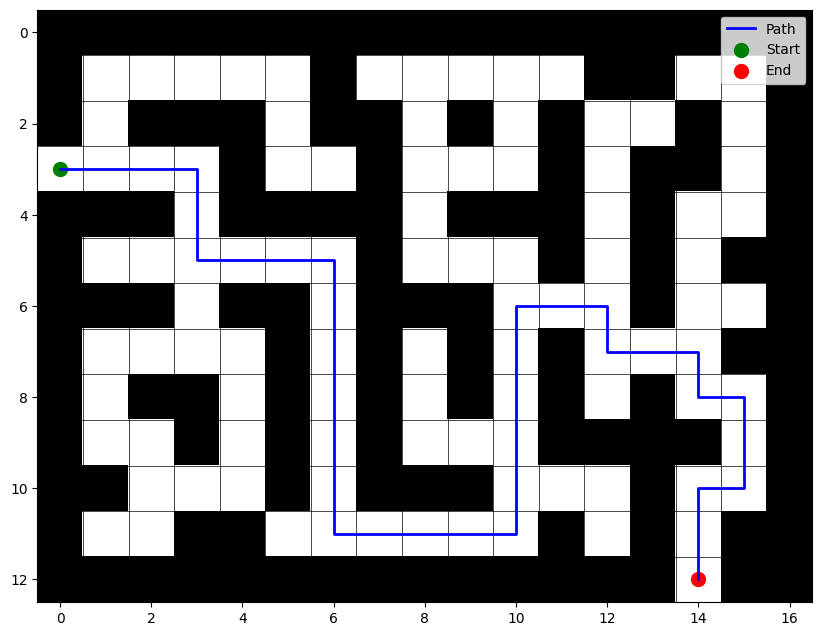

Labirin 1: Runtime: 0.000067 seconds
Labirin 2: Runtime: 0.000083 seconds
Labirin 3: Runtime: 0.000237 seconds
Labirin 4: Runtime: 0.000604 seconds
Labirin 5: Runtime: 0.000365 seconds


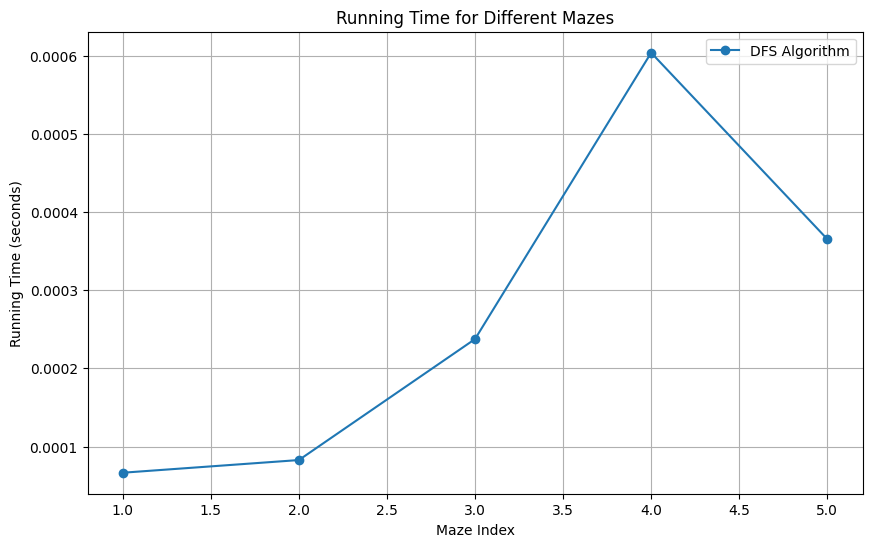

In [9]:
# Kelompok : Cosmic Duo
# Kelas    : IF-10-04
# Anggota  : Anissa Sekar Prasasti (2211102156) - Shofia Ike Rahmawati (2211102164)

# Menggunakan Algoritma DFS

# Import library untuk visualisasi (matplotlib) dan operasi array (numpy)
import matplotlib.pyplot as plt
import numpy as np
import time

# Fungsi DFS untuk mencari jalur dalam labirin
def dfs(maze, start, end):
    # Inisialisasi stack untuk menyimpan posisi yang perlu dieksplorasi
    stack = [start]
    # Set untuk melacak node yang sudah dikunjungi
    visited = set()
    # Dictionary untuk menyimpan jejak node sebelumnya
    came_from = {}

    while stack:
        # Ambil elemen terakhir dari stack
        current = stack.pop()
        # Jika node sudah dikunjungi, lewati
        if current in visited:
            continue
        # Tandai node sebagai dikunjungi
        visited.add(current)

        # Jika node tujuan tercapai, konstruksi jalur dari akhir ke awal
        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start) # Tambahkan node awal ke jalur
            return path[::-1] # Balikkan urutan jalur agar dimulai dari awal

        # Dapatkan tetangga dari node saat ini
        x, y = current
        neighbors = [(x + dx, y + dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]]

        for neighbor in neighbors:
            # Periksa apakah tetangga valid (dalam batas, tidak ada dinding, dan belum dikunjungi)
            if (0 <= neighbor[0] < len(maze) and
                0 <= neighbor[1] < len(maze[0]) and
                maze[neighbor[0]][neighbor[1]] == 0 and
                neighbor not in visited):
                # Tambahkan tetangga ke stack dan perbarui jejak
                stack.append(neighbor)
                came_from[neighbor] = current

    # Kembalikan None jika tidak ada jalur yang ditemukan
    return None

# Fungsi untuk mencetak jalur dengan format baris maksimal 5 elemen per baris
def format_path(path, max_per_line=5):
    # Buat string hasil jalur dengan elemen maksimal per baris sesuai `max_per_line`
    formatted_path = "["
    for i in range(0, len(path), max_per_line):
        formatted_path += ", ".join(map(str, path[i:i + max_per_line]))
        if i + max_per_line < len(path):
            formatted_path += ",\n "  # Tambahkan newline hanya jika masih ada elemen berikutnya
    formatted_path += "]"
    return formatted_path


# Fungsi untuk memvisualisasikan labirin beserta jalur
def visualize_maze(maze, path=None, start=None, end=None):
    # Konversi labirin ke array numpy
    maze_array = np.array(maze)

    # Buat plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(maze_array, cmap="Greys", origin="upper")

    # Visualisasikan jalur, jika tersedia
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_y, path_x, color="blue", linewidth=2, label="Path")

    # Tandai titik awal dan akhir
    if start:
        ax.scatter(start[1], start[0], color="green", s=100, label="Start")
    if end:
        ax.scatter(end[1], end[0], color="red", s=100, label="End")

    # Tambahkan grid untuk memudahkan pembacaan
    ax.set_xticks(np.arange(-0.5, len(maze[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(maze), 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    ax.legend()
    plt.show()

# Labirin yang akan diuji
# Labirin 1 (5x5)
maze1 = [
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 0, 1],
]
start1, end1 = (1, 0), (4, 3)

# Labirin 2 (7x8)
maze2 = [
    [1, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
]
start2, end2 = (0, 1), (4, 7)

# Labirin 3 (9x10)
maze3 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]
start3, end3 = (1, 0), (0, 8)

# Labirin 4 (13x15)
maze4 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
    [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
]
start4, end4 = (1, 0), (12, 13)

# Labirin 5 (13x17)
maze5 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
    [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
]
start5, end5 = (3, 0), (12, 14)

mazes = [
    (maze1, start1, end1),
    (maze2, start2, end2),
    (maze3, start3, end3),
    (maze4, start4, end4),
    (maze5, start5, end5),
]

# Jalankan DFS dan visualisasi untuk setiap labirin
for idx, (maze, start, end) in enumerate(mazes, start=1):
    # Temukan jalur menggunakan DFS
    dfs_path = dfs(maze, start, end)
    # Cetak jalur yang ditemukan
    print(f"Jalur yang ditemukan DFS (Labirin {idx}):\n{format_path(dfs_path)}")
    # Visualisasikan labirin dan jalur
    visualize_maze(maze, path=dfs_path, start=start, end=end)

# Fungsi Pengukuran Waktu
def measure_runtime(algorithm, maze, start, end):
    start_time = time.time() # Catat waktu mulai
    path = algorithm(maze, start, end) # Jalankan algoritma
    end_time = time.time() # Catat waktu selesai
    runtime = end_time - start_time # Hitung waktu eksekusi
    return runtime, path

# Analisis efisiensi untuk setiap labirin
runtimes = []

for i, (maze, start, end) in enumerate(mazes):
    runtime, _ = measure_runtime(dfs, maze, start, end)
    runtimes.append(runtime) # Simpan waktu eksekusi
    print(f"Labirin {i + 1}: Runtime: {runtime:.6f} seconds")

# Visualisasi Grafik Waktu Eksekusi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mazes) + 1), runtimes, marker='o', label="DFS Algorithm")
plt.xlabel("Maze Index") # Label sumbu x
plt.ylabel("Running Time (seconds)") # Label sumbu y
plt.title("Running Time for Different Mazes")
plt.grid()
plt.legend()
plt.show()

Jalur yang ditemukan BFS (Labirin 1):
[(1, 0), (1, 1), (1, 2), (2, 2), (3, 2),
 (3, 3), (4, 3)]


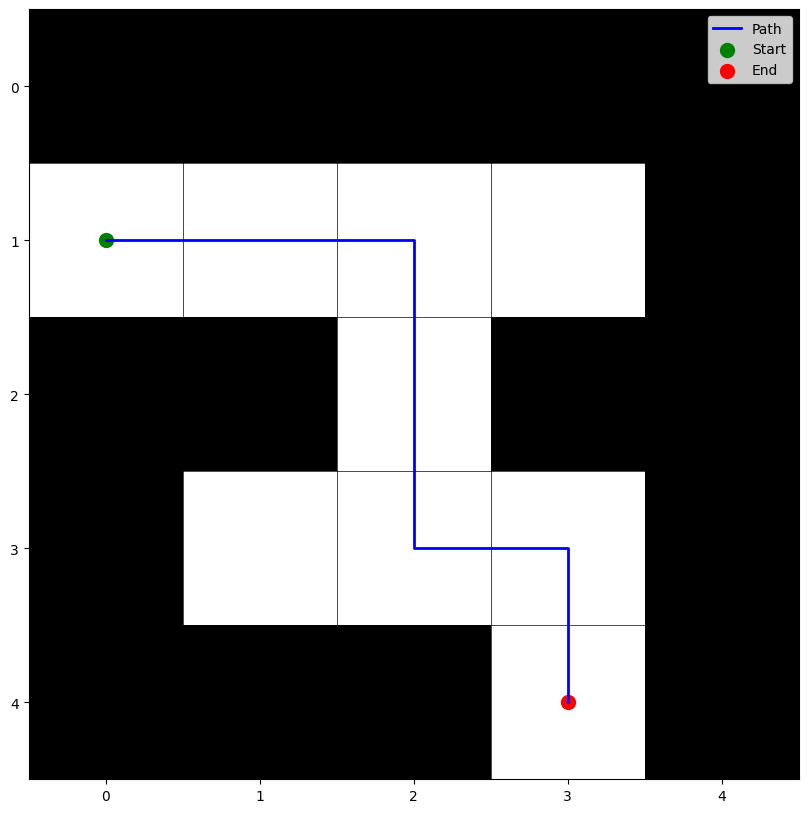

Jalur yang ditemukan BFS (Labirin 2):
[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3),
 (2, 4), (2, 5), (3, 5), (3, 6), (4, 6),
 (4, 7)]


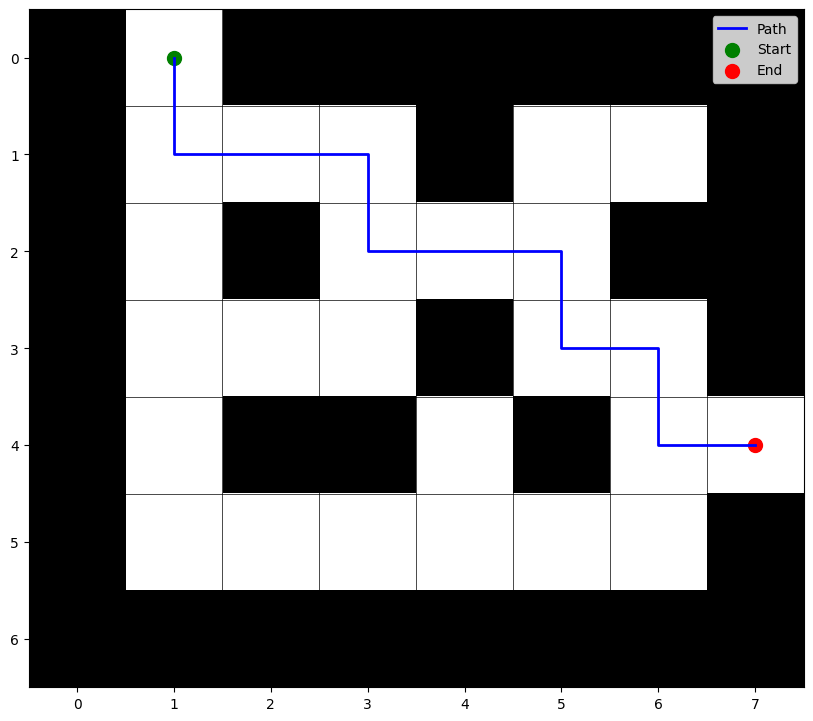

Jalur yang ditemukan BFS (Labirin 3):
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2),
 (4, 2), (5, 2), (5, 3), (6, 3), (7, 3),
 (7, 4), (7, 5), (7, 6), (7, 7), (7, 8),
 (6, 8), (5, 8), (4, 8), (4, 7), (3, 7),
 (2, 7), (2, 8), (1, 8), (0, 8)]


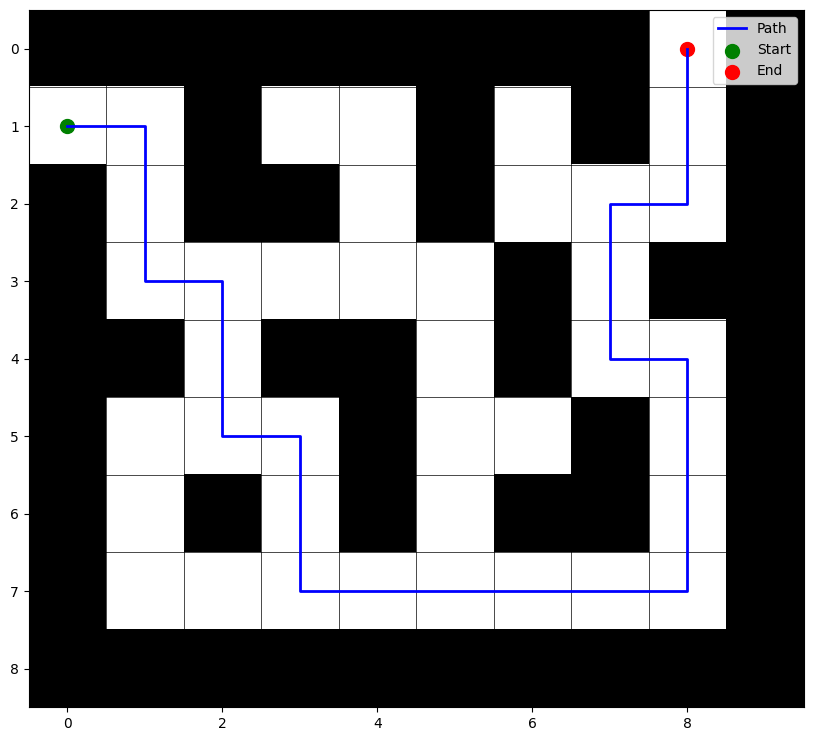

Jalur yang ditemukan BFS (Labirin 4):
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2),
 (3, 3), (3, 4), (4, 4), (5, 4), (5, 5),
 (5, 6), (5, 7), (5, 8), (5, 9), (5, 10),
 (6, 10), (7, 10), (7, 11), (7, 12), (8, 12),
 (9, 12), (9, 11), (9, 10), (9, 9), (9, 8),
 (10, 8), (11, 8), (11, 9), (11, 10), (11, 11),
 (11, 12), (11, 13), (12, 13)]


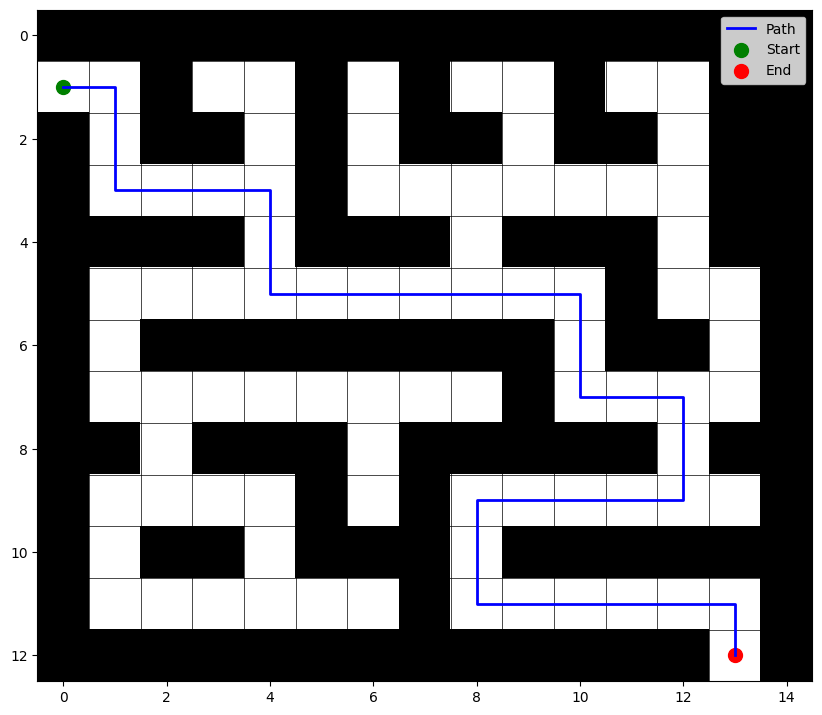

Jalur yang ditemukan BFS (Labirin 5):
[(3, 0), (3, 1), (3, 2), (3, 3), (4, 3),
 (5, 3), (5, 4), (5, 5), (5, 6), (6, 6),
 (7, 6), (8, 6), (9, 6), (10, 6), (11, 6),
 (11, 7), (11, 8), (11, 9), (11, 10), (10, 10),
 (9, 10), (8, 10), (7, 10), (6, 10), (6, 11),
 (6, 12), (7, 12), (7, 13), (7, 14), (8, 14),
 (8, 15), (9, 15), (10, 15), (10, 14), (11, 14),
 (12, 14)]


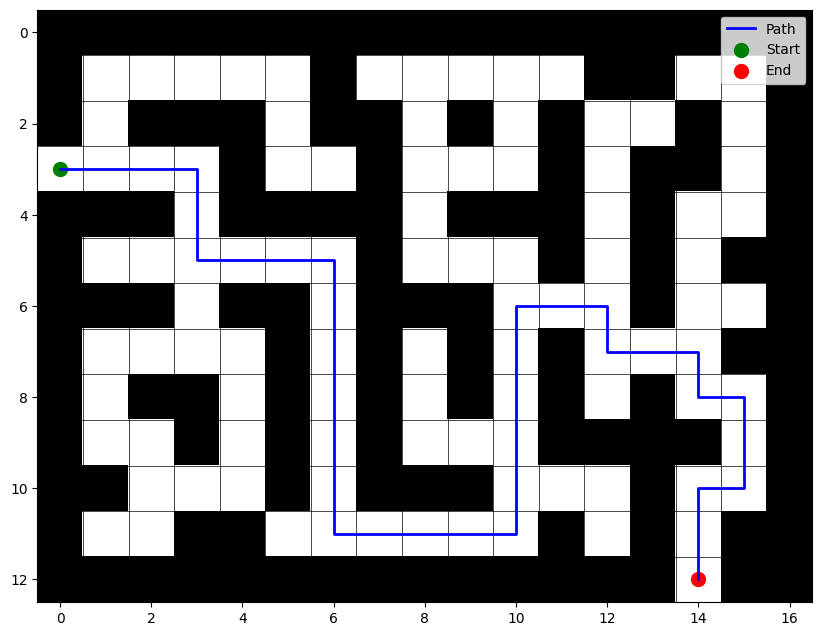

Labirin 1: Runtime: 0.000065 seconds
Labirin 2: Runtime: 0.000157 seconds
Labirin 3: Runtime: 0.000222 seconds
Labirin 4: Runtime: 0.000482 seconds
Labirin 5: Runtime: 0.000632 seconds


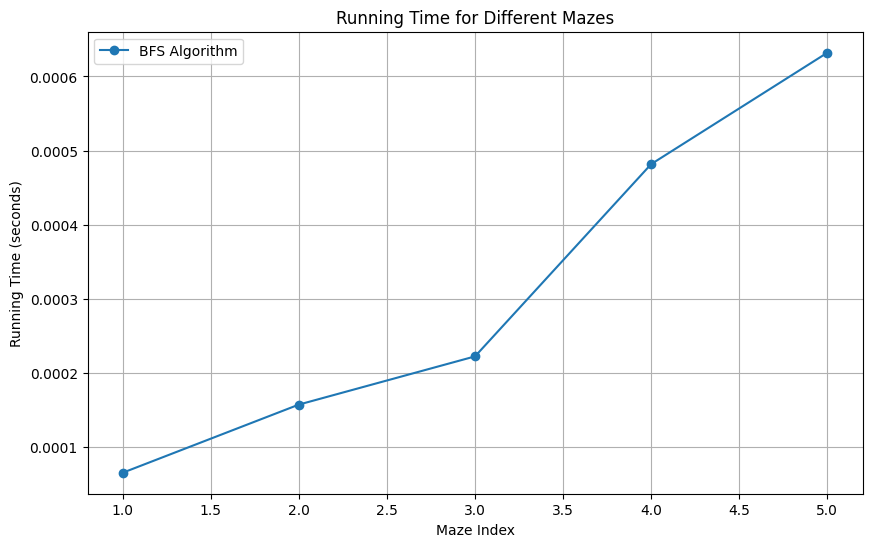

In [10]:
# Kelompok : Cosmic Duo
# Kelas    : IF-10-04
# Anggota  : Anissa Sekar Prasasti (2211102156) - Shofia Ike Rahmawati (2211102164)

# Menggunakan Algoritma BFS untuk mencari jalur terpendek dalam labirin
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time

# Fungsi BFS untuk mencari jalur dari titik awal (start) ke titik tujuan (end)
def bfs(maze, start, end):
    queue = deque([start])  # Inisialisasi queue dengan titik awal
    visited = set([start])  # Set untuk menyimpan titik yang sudah dikunjungi
    came_from = {start: None}  # Dictionary untuk melacak jalur kembali dari setiap titik

    while queue:
        current = queue.popleft()  # Ambil elemen pertama dari queue untuk diproses

        # Jika titik tujuan ditemukan, rekonstruksi jalur dari start ke end
        if current == end:
            path = [] # List untuk menyimpan jalur
            while current is not None:
                path.append(current) # Tambahkan titik ke jalur
                current = came_from[current] # Lanjutkan ke titik sebelumnya
            return path[::-1]  # Balikkan urutan untuk mendapatkan jalur dari start ke end

        # Tetapkan koordinat (x, y) dari titik saat ini
        x, y = current
        # Tetapkan tetangga (atas, bawah, kiri, kanan)
        neighbors = [(x + dx, y + dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]]

        for neighbor in neighbors:
            # Validasi jika tetangga berada dalam batas maze, dapat dilalui, dan belum dikunjungi
            if (0 <= neighbor[0] < len(maze) and
                0 <= neighbor[1] < len(maze[0]) and
                maze[neighbor[0]][neighbor[1]] == 0 and
                neighbor not in visited):
                visited.add(neighbor)  # Tandai sebagai dikunjungi
                queue.append(neighbor)  # Tambahkan ke queue
                came_from[neighbor] = current  # Simpan jalur kembali

    return None  # Kembalikan None jika tidak ditemukan jalur

# Fungsi untuk memformat jalur menjadi string agar mudah dibaca
def format_path(path, max_per_line=5):
    if path is None:
        return "[]"
    formatted_path = "["
    for i in range(0, len(path), max_per_line):
        formatted_path += ", ".join(map(str, path[i:i + max_per_line]))
        if i + max_per_line < len(path):
            formatted_path += ",\n "  # Tambahkan newline hanya jika masih ada elemen berikutnya
    formatted_path += "]"
    return formatted_path


# Daftar labirin dan titik awal/akhir
mazes = [
    (maze1, start1, end1),
    (maze2, start2, end2),
    (maze3, start3, end3),
    (maze4, start4, end4),
    (maze5, start5, end5),
]

# Jalankan BFS untuk setiap labirin dan visualisasi
for i, (maze, start, end) in enumerate(mazes, 1):
    bfs_path = bfs(maze, start, end)
    print(f"Jalur yang ditemukan BFS (Labirin {i}):\n{format_path(bfs_path)}")
    visualize_maze(maze, path=bfs_path, start=start, end=end)

# Fungsi Pengukuran Waktu
def measure_runtime(algorithm, maze, start, end):
    start_time = time.time()
    path = algorithm(maze, start, end)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime, path

# Analisis Efisiensi
runtimes = []

for i, (maze, start, end) in enumerate(mazes):
    runtime, _ = measure_runtime(bfs, maze, start, end)
    runtimes.append(runtime)
    print(f"Labirin {i + 1}: Runtime: {runtime:.6f} seconds")

# Visualisasi Grafik Waktu Eksekusi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mazes) + 1), runtimes, marker='o', label="BFS Algorithm")
plt.xlabel("Maze Index")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time for Different Mazes")
plt.grid()
plt.legend()
plt.show()

Jalur yang ditemukan A* (Labirin 1):
[ (1, 0), (1, 1), (1, 2), (2, 2), (3, 2),
 (3, 3), (4, 3)]


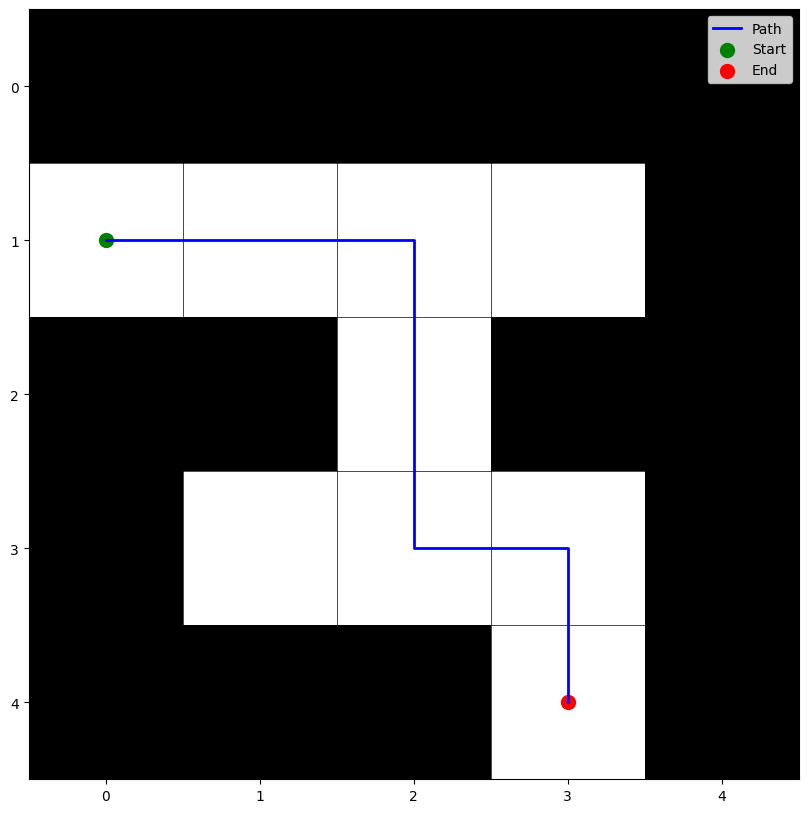

Jalur yang ditemukan A* (Labirin 2):
[ (0, 1), (1, 1), (1, 2), (1, 3), (2, 3),
 (2, 4), (2, 5), (3, 5), (3, 6), (4, 6),
 (4, 7)]


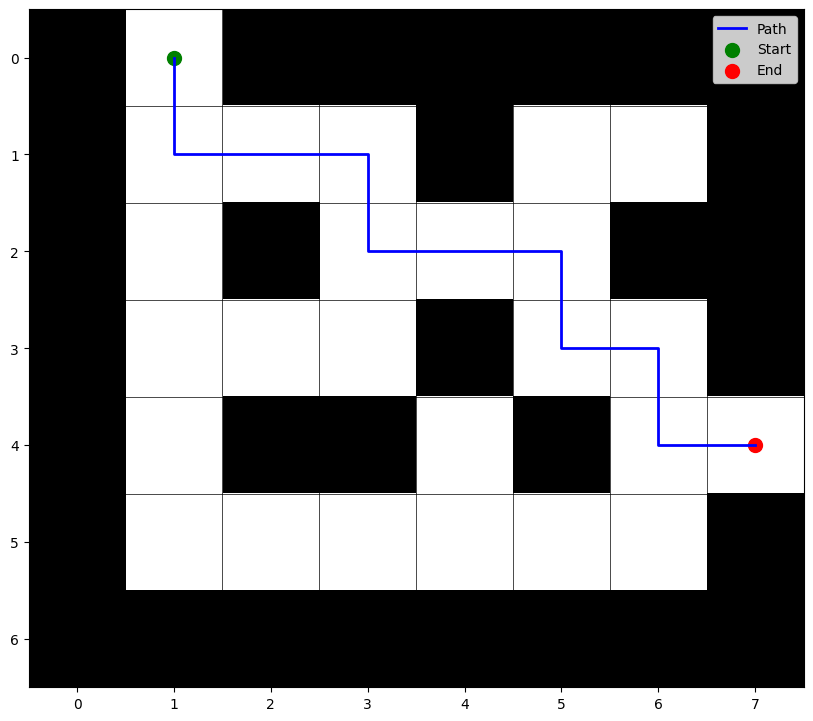

Jalur yang ditemukan A* (Labirin 3):
[ (1, 0), (1, 1), (2, 1), (3, 1), (3, 2),
 (3, 3), (3, 4), (3, 5), (4, 5), (5, 5),
 (6, 5), (7, 5), (7, 6), (7, 7), (7, 8),
 (6, 8), (5, 8), (4, 8), (4, 7), (3, 7),
 (2, 7), (2, 8), (1, 8), (0, 8)]


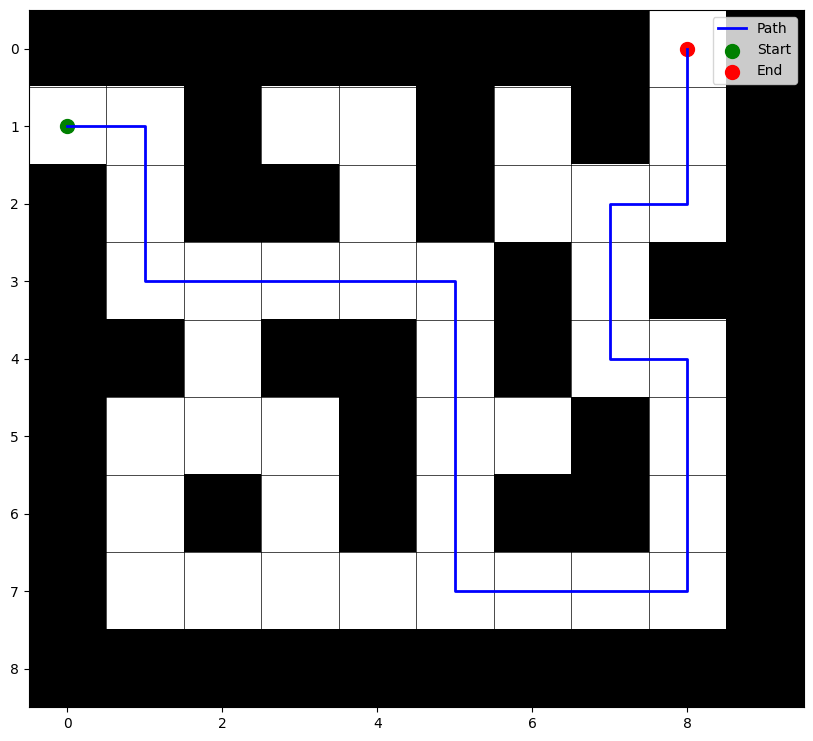

Jalur yang ditemukan A* (Labirin 4):
[ (1, 0), (1, 1), (2, 1), (3, 1), (3, 2),
 (3, 3), (3, 4), (4, 4), (5, 4), (5, 5),
 (5, 6), (5, 7), (5, 8), (5, 9), (5, 10),
 (6, 10), (7, 10), (7, 11), (7, 12), (8, 12),
 (9, 12), (9, 11), (9, 10), (9, 9), (9, 8),
 (10, 8), (11, 8), (11, 9), (11, 10), (11, 11),
 (11, 12), (11, 13), (12, 13)]


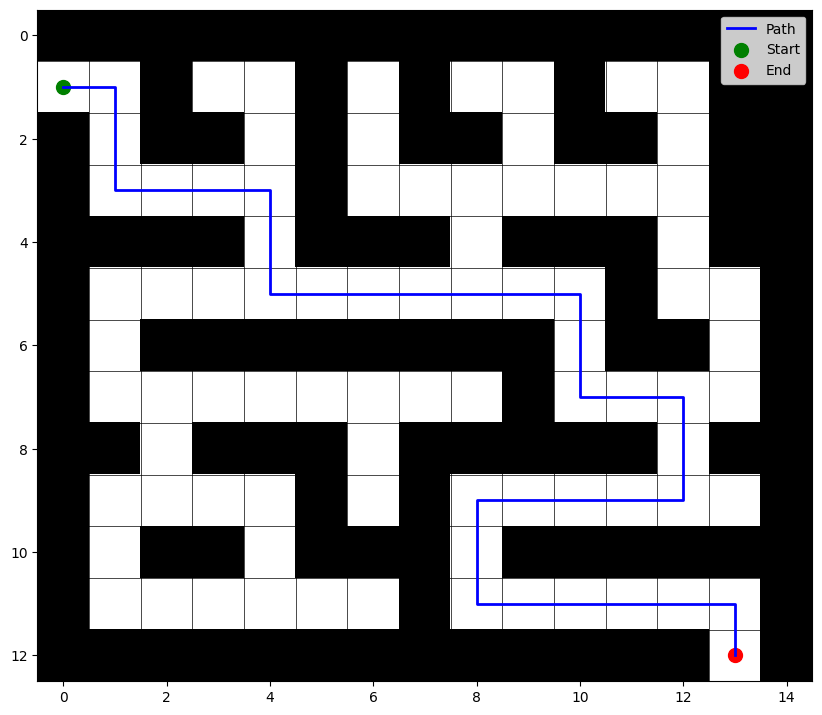

Jalur yang ditemukan A* (Labirin 5):
[ (3, 0), (3, 1), (3, 2), (3, 3), (4, 3),
 (5, 3), (5, 4), (5, 5), (5, 6), (6, 6),
 (7, 6), (8, 6), (9, 6), (10, 6), (11, 6),
 (11, 7), (11, 8), (11, 9), (11, 10), (10, 10),
 (9, 10), (8, 10), (7, 10), (6, 10), (6, 11),
 (6, 12), (7, 12), (7, 13), (7, 14), (8, 14),
 (8, 15), (9, 15), (10, 15), (10, 14), (11, 14),
 (12, 14)]


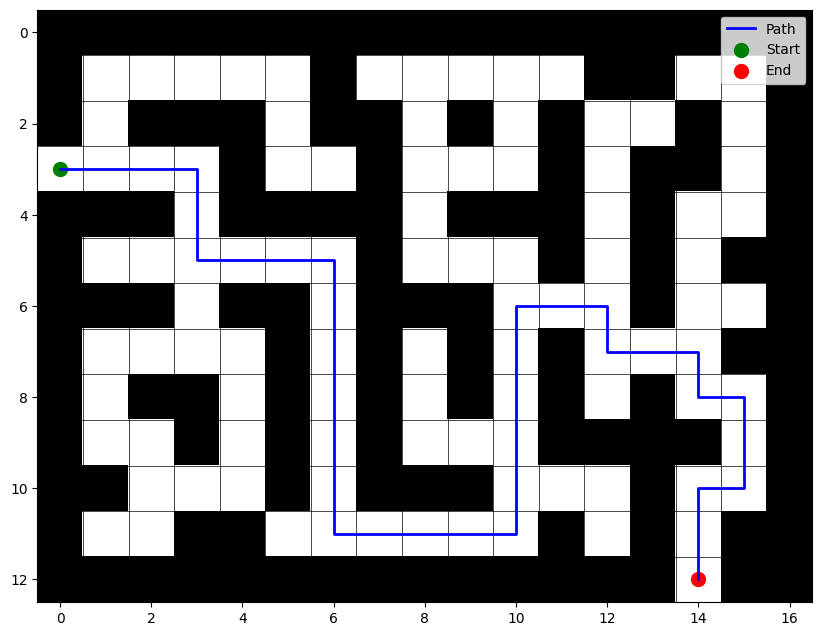

Labirin 1: Runtime: 0.000061 seconds
Labirin 2: Runtime: 0.000110 seconds
Labirin 3: Runtime: 0.000195 seconds
Labirin 4: Runtime: 0.000424 seconds
Labirin 5: Runtime: 0.000406 seconds


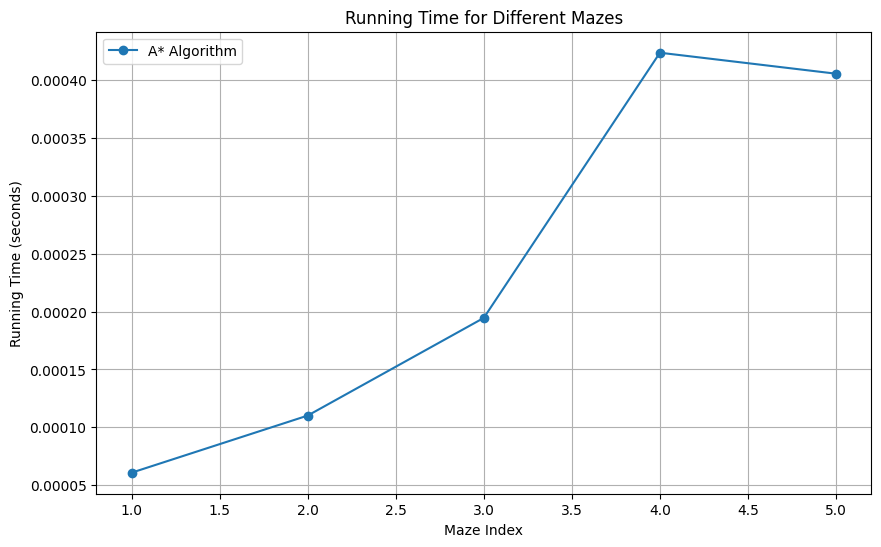

In [11]:
# Kelompok : Cosmic Duo
# Kelas    : IF-10-04
# Anggota  : Anissa Sekar Prasasti (2211102156) - Shofia Ike Rahmawati (2211102164)

# Menggunakan Algoritma A* (A Star)
import heapq # Mengimpor heapq untuk memanfaatkan struktur data heap (prioritas antrian).
import matplotlib.pyplot as plt # Digunakan untuk memvisualisasikan grafik.
import numpy as np # Digunakan untuk manipulasi array, meskipun belum digunakan dalam kode ini.
import time # Digunakan untuk pengukuran waktu eksekusi.

# Fungsi Heuristic
def heuristic(a, b):
    # Menghitung jarak Manhattan antara dua titik (a dan b).
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Fungsi Implementasi Algoritma A*
def astar(maze, start, end):
    # Inisialisasi open_set sebagai heap priority queue.
    open_set = []
    heapq.heappush(open_set, (0, start)) # Memasukkan node awal dengan prioritas 0.

    # Dictionary untuk melacak jalur.
    came_from = {}
    g_score = {start: 0} # G-score awal untuk node start adalah 0.
    f_score = {start: heuristic(start, end)} # F-score awal berdasarkan heuristic.

    while open_set: # Iterasi hingga open_set kosong.
        # Mengambil node dengan nilai f_score terkecil.
        current = heapq.heappop(open_set)[1]

        if current == end: # Jika node akhir ditemukan.
            path = [] # Membangun kembali jalur dari akhir ke awal.
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start) # Menambahkan titik awal.
            return path[::-1]  # Mengembalikan jalur dalam urutan benar.

        # Mendapatkan tetangga (neighbors) dari node saat ini.
        x, y = current
        neighbors = [(x + dx, y + dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]]

        for neighbor in neighbors:
            # Mengecek apakah tetangga valid dan tidak berada di dinding (maze bernilai 1).
            if (not (0 <= neighbor[0] < len(maze) and
                      0 <= neighbor[1] < len(maze[0])) or
                      maze[neighbor[0]][neighbor[1]] == 1):
                continue

            # Menghitung g_score sementara.
            tentative_g_score = g_score[current] + 1

            if tentative_g_score < g_score.get(neighbor, float('inf')): # Jika ditemukan jalur lebih baik.
                came_from[neighbor] = current # Menyimpan jalur dari current ke neighbor.
                g_score[neighbor] = tentative_g_score # Memperbarui g_score.
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, end) # Memperbarui f_score.

                # Jika tetangga belum ada di open_set, tambahkan.
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None # Mengembalikan None jika tidak ditemukan jalur.

# Fungsi Format Path
def format_path(path):
    if not path:
        return "No path found" # Jika path tidak ada.
    formatted_path = "[" # Awal format jalur.
    for i, coord in enumerate(path):
        formatted_path += f" {coord}"
        if i < len(path) - 1:
            formatted_path += ","
        if (i + 1) % 5 == 0:  # Membuat baris baru setiap 5 koordinat
            formatted_path += "\n"
    formatted_path += "]"
    return formatted_path

# Labirin
mazes = [
    (maze1, start1, end1),
    (maze2, start2, end2),
    (maze3, start3, end3),
    (maze4, start4, end4),
    (maze5, start5, end5),
]

# Jalankan A* untuk setiap labirin dan visualisasi
for i, (maze, start, end) in enumerate(mazes, 1):
    path = astar(maze, start, end) # Menjalankan algoritma A*.
    print(f"Jalur yang ditemukan A* (Labirin {i}):\n{format_path(path)}")
    visualize_maze(maze, path=path, start=start, end=end) # Memvisualisasikan jalur pada labirin.

# Fungsi Pengukuran Waktu
def measure_runtime(algorithm, maze, start, end):
    start_time = time.time() # Catat waktu mulai.
    path = algorithm(maze, start, end) # Jalankan algoritma.
    end_time = time.time() # Catat waktu selesai.
    runtime = end_time - start_time # Hitung durasi waktu eksekusi.
    return runtime, path

# Analisis Efisiensi
runtimes = []

for i, (maze, start, end) in enumerate(mazes):
    runtime, _ = measure_runtime(astar, maze, start, end)
    runtimes.append(runtime)
    print(f"Labirin {i + 1}: Runtime: {runtime:.6f} seconds")

# Visualisasi Grafik Waktu Eksekusi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mazes) + 1), runtimes, marker='o', label="A* Algorithm")
plt.xlabel("Maze Index")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time for Different Mazes")
plt.grid()
plt.legend()
plt.show()